In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import SVG
from  graphviz import Source
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'

HTML(style)


sns.set(rc={'figure.figsize':(15,6)})

In [2]:
iris_data=pd.read_csv('train_iris.csv')
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [3]:
test_iris_data=pd.read_csv('test_iris.csv')
test_iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   sepal length  100 non-null    float64
 2   sepal width   100 non-null    float64
 3   petal length  100 non-null    float64
 4   petal width   100 non-null    float64
 5   species       100 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


In [5]:
iris_data.species.value_counts()

0    35
2    35
1    30
Name: species, dtype: int64

In [6]:
iris_data.isna().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [7]:
iris_data.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [8]:
type(iris_data['species'])

pandas.core.series.Series

In [9]:
iris_data.species.dtype

dtype('int64')

In [10]:
#iris_data.species=iris_data.species.astype('category')


In [11]:
iris_data.species.dtype

dtype('int64')

In [12]:
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [13]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   sepal length  100 non-null    float64
 2   sepal width   100 non-null    float64
 3   petal length  100 non-null    float64
 4   petal width   100 non-null    float64
 5   species       100 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 4.8 KB


In [14]:
X_train = iris_data.iloc[:,1:5]
y_train = iris_data['species']

X_test = test_iris_data.iloc[:,1:5]
y_test = test_iris_data['species']


In [15]:
X_test

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4
5,7.2,3.2,6.0,1.8
6,5.5,3.5,1.3,0.2
7,6.9,3.1,5.1,2.3
8,4.8,3.0,1.4,0.1
9,6.1,2.9,4.7,1.4


In [16]:
y= iris_data.species
X=iris_data.iloc[:,1:5]
#X
y

0     2
1     0
2     0
3     2
4     2
     ..
95    2
96    2
97    2
98    2
99    1
Name: species, Length: 100, dtype: int64

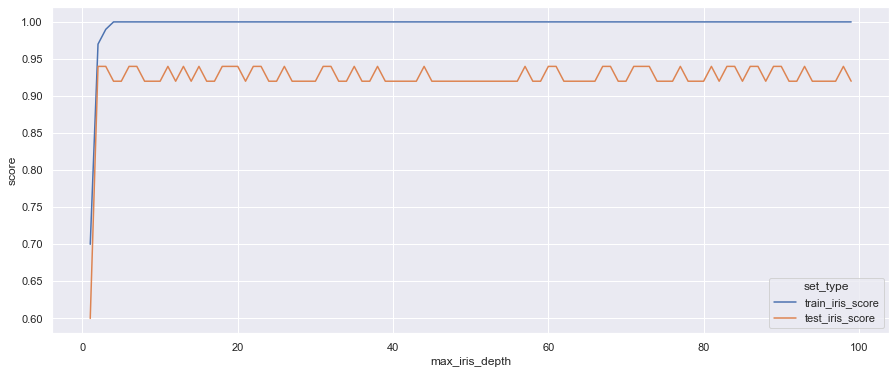

In [17]:
max_iris_depth_values = range(1, 100)

# Обнулим DataFrame.
scores_iris_data = pd.DataFrame()

#  Задаем random seed.
rs = np.random.seed(0)

for max_iris_depth in max_iris_depth_values:
    # Изменяем глубину обучения дерева по циклу от 1 до 99 с шагом 1.
    clf_iris = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_iris_depth, random_state=rs)
    # Обучаем дерево решений (с ограниченной глубиной) на подмножестве train.
    clf_iris.fit(X_train, y_train)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество train)
    train_iris_score = clf_iris.score(X_train, y_train)
    # Записываем в отдельную переменную число правильных ответов на обученной модели дерева
    # с ограниченной глубиной (подмножество test)
    test_iris_score = clf_iris.score(X_test, y_test)
    # Создаем временный DataFrame.
    temp_score_iris_data = pd.DataFrame({'max_iris_depth':[max_iris_depth],
                                         'train_iris_score':[train_iris_score],
                                         'test_iris_score':[test_iris_score]})
    # Наращиваем DataFrame "scores_iris_data".
    scores_iris_data = scores_iris_data.append(temp_score_iris_data)

# Видоизменим DataFrame, применив метод melt().
scores_iris_data_long = pd.melt(scores_iris_data, id_vars=['max_iris_depth'],
                           value_vars=['train_iris_score','test_iris_score'],
                           var_name='set_type', value_name='score')

# Визуализация.
sns.lineplot(x='max_iris_depth', y='score', hue='set_type', data=scores_iris_data_long)

# Отображение графиков Matplotlib и Seaborn в PyCharm.
plt.show()
